**<u><center>CASE STUDY ON UNSUPERVISED LEARNING**</center><br><br>
The Whole sale customer data is given
1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform PCA for Dimensionality reduction.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [169]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [170]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


*Here are a few pairs of features that exhibit some degree of correlation.
They include:
Grocery and Detergents_Paper are highly correlated - 0.92
Milk and Groceries - 0.73
Milk and Detergents_Paper - 0.66*

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [172]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [173]:
# Scale the data
from sklearn.preprocessing import scale
scaled_data = scale(data)

In [174]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [175]:
from sklearn.cluster import KMeans

In [176]:
wcss = []
for i in range(2,16):
  km = KMeans(n_clusters=i, n_init = 20)
  km.fit(scaled_data)
  css = km.inertia_
  wcss.append(css)

In [177]:
wcss

[2599.384423783626,
 2149.283956221758,
 1851.8408722743848,
 1561.7923349116593,
 1314.1997560278016,
 1173.7285957651095,
 1050.640013144639,
 974.323311171003,
 897.3017898583588,
 849.9329781033496,
 803.1119058401016,
 744.8401190461136,
 704.8244664316139,
 670.6619210765793]

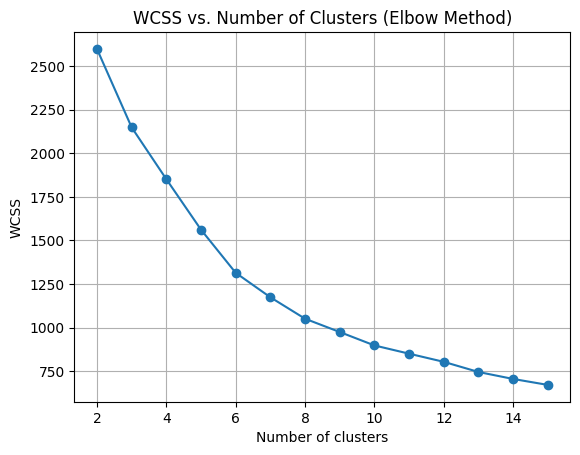

In [178]:
plt.plot(range(2,16),wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters (Elbow Method)')
plt.grid()
plt.show()

***Hence choosing 6 clusters as the optimal number of clusters for our KMeans clustering in this case.***

In [179]:
# Creating the final clustering model with the chosen number of clusters
km = KMeans(n_clusters=6, init='k-means++',n_init=100, random_state=0)
y_means = km.fit(scaled_data)

In [180]:
cluster_labels = km.predict(scaled_data)

In [181]:
cluster_labels

array([0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5,
       1, 0, 0, 0, 5, 5, 0, 1, 5, 5, 5, 1, 5, 0, 1, 0, 0, 1, 1, 5, 0, 0,
       0, 0, 0, 3, 0, 0, 5, 5, 1, 0, 5, 5, 3, 0, 5, 5, 0, 3, 0, 0, 5, 3,
       5, 0, 5, 5, 1, 1, 5, 0, 0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 0, 3, 3, 1,
       5, 5, 5, 5, 3, 1, 0, 5, 0, 5, 5, 5, 0, 0, 0, 1, 5, 5, 0, 0, 0, 0,
       5, 0, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 1, 5, 0, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 5, 5, 5, 0, 0, 5, 0, 5, 0,
       1, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 0, 0, 5, 5, 5, 0, 5, 5, 1, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 5, 5, 1, 1, 5, 0, 5, 0, 1, 1, 1, 1,
       5, 5, 5, 1, 5, 5, 5, 0, 2, 0, 2, 0, 0, 2, 0,

In [182]:
pd.Series(cluster_labels).value_counts()

5    172
0    125
2     86
1     46
3     10
4      1
dtype: int64

In [183]:
#  Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can choose the number of components as needed
principal_components = pca.fit_transform(scaled_data)

In [184]:
# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

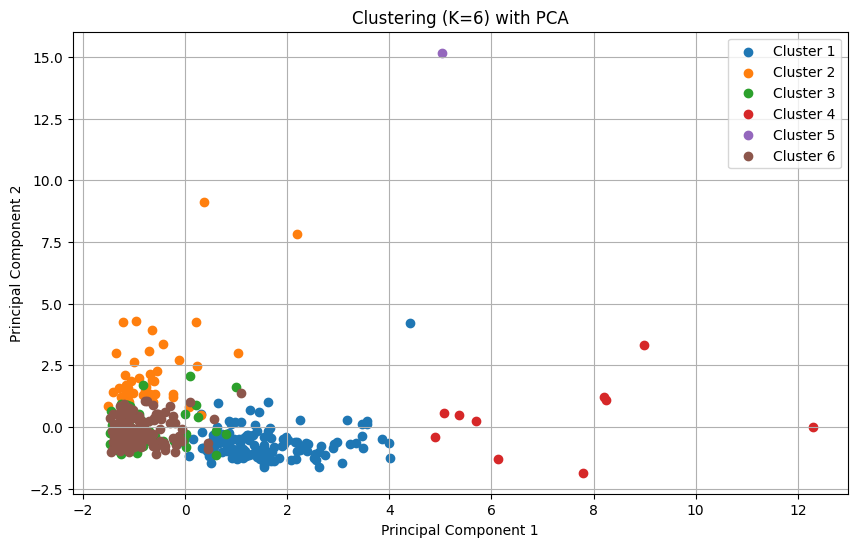

In [185]:
plt.figure(figsize=(10, 6))
for cluster in range(6):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clustering (K={6}) with PCA')
plt.legend()
plt.grid()
plt.show()

In [186]:
pca.explained_variance_

array([3.10707136, 1.79404441])

In [187]:
pca.explained_variance_ratio_*100

array([38.75012291, 22.37458795])

***From the above output, we can observe that the principal component 1 holds 38.75% of the information while the principal component 2 holds only 22.37% of the information.***

In [195]:
pca4 = PCA(n_components=4).fit(scaled_data)
pca4d = pca4.transform(scaled_data)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)


Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]
